##### import seaborn as sns
import os
import glob
import pandas as pd
import numpy as np
import pycytominer
from itertools import cycle

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms


from functions_jonne import run_pca_all_plates
from functions_jonne import run_pca_per_plate
from functions_jonne import group_features
from functions_jonne import display_scree_plot

%matplotlib inline

os.chdir('./output/PCA')

In [2]:
current_directory = os.getcwd()
print("Current directory:", current_directory)

Current directory: /home/jovyan/jonne/Feature_Analysis/2023/Feature_Analysis_SSS-val-A549-v2-JR/output/PCA


# PCA plot on normalized features

In [16]:
df_all    = pd.read_parquet("../level5_AllPlates_mad_robustize_DMSO.parquet")
df_all.head(2)

,Metadata_plate_map_name,Metadata_cmpdName,Metadata_cmpdConc,Metadata_Well,Metadata_Site,Metadata_Object_Count,Nuclei_AreaShape_Area,Nuclei_AreaShape_BoundingBoxArea,Nuclei_AreaShape_BoundingBoxMaximum_X,Nuclei_AreaShape_BoundingBoxMaximum_Y,...,Cells_RadialDistribution_ZernikePhase_RNA_8_0,Cells_RadialDistribution_ZernikePhase_RNA_8_2,Cells_RadialDistribution_ZernikePhase_RNA_8_4,Cells_RadialDistribution_ZernikePhase_RNA_8_6,Cells_RadialDistribution_ZernikePhase_RNA_8_8,Cells_RadialDistribution_ZernikePhase_RNA_9_1,Cells_RadialDistribution_ZernikePhase_RNA_9_3,Cells_RadialDistribution_ZernikePhase_RNA_9_5,Cells_RadialDistribution_ZernikePhase_RNA_9_7,Cells_RadialDistribution_ZernikePhase_RNA_9_9
0,P103558,DI1202001,30.0,A02,1.0,212,1.599668,1.164477,-0.222791,-0.553293,...,0.360425,-0.245819,0.491868,0.092940,-0.394195,-0.371830,0.399553,0.601450,0.846439,0.669011
1,P103558,DI1202001,30.0,A02,2.0,199,2.461019,2.421027,0.026616,-0.489587,...,-0.289937,1.403819,1.815595,0.579376,0.558275,-0.158478,-1.297861,1.173261,-1.206204,-0.094362


In [17]:
df = df_all.copy()

#------------- plates ----------------#
selected_plates = ["P103573","P103587","P103588"]
df = df[~df['Metadata_plate_map_name'].isin(selected_plates)]

# ----------- compounds ---------------#
selected_compounds = ["DMSO", "uninfected","DD4386006"]
df = df[df['Metadata_cmpdName'].isin(selected_compounds)]

#------------- doses ----------------#
selected_doses = [0.3,10.0]
df = df[df['Metadata_cmpdConc'].isin(selected_doses)]

# remove AB features !!!
df = df.filter(regex='^(?!.*ER)') #remove AB features
#df   = df.filter(regex='(ER|^Metadata)') # only AB features!

# plot using Seaborn

In [18]:
unique_cmpdNames = df["Metadata_cmpdName"].dropna().unique().tolist()
unique_cmpdNames

['uninfected', 'DMSO', 'DD4386006']

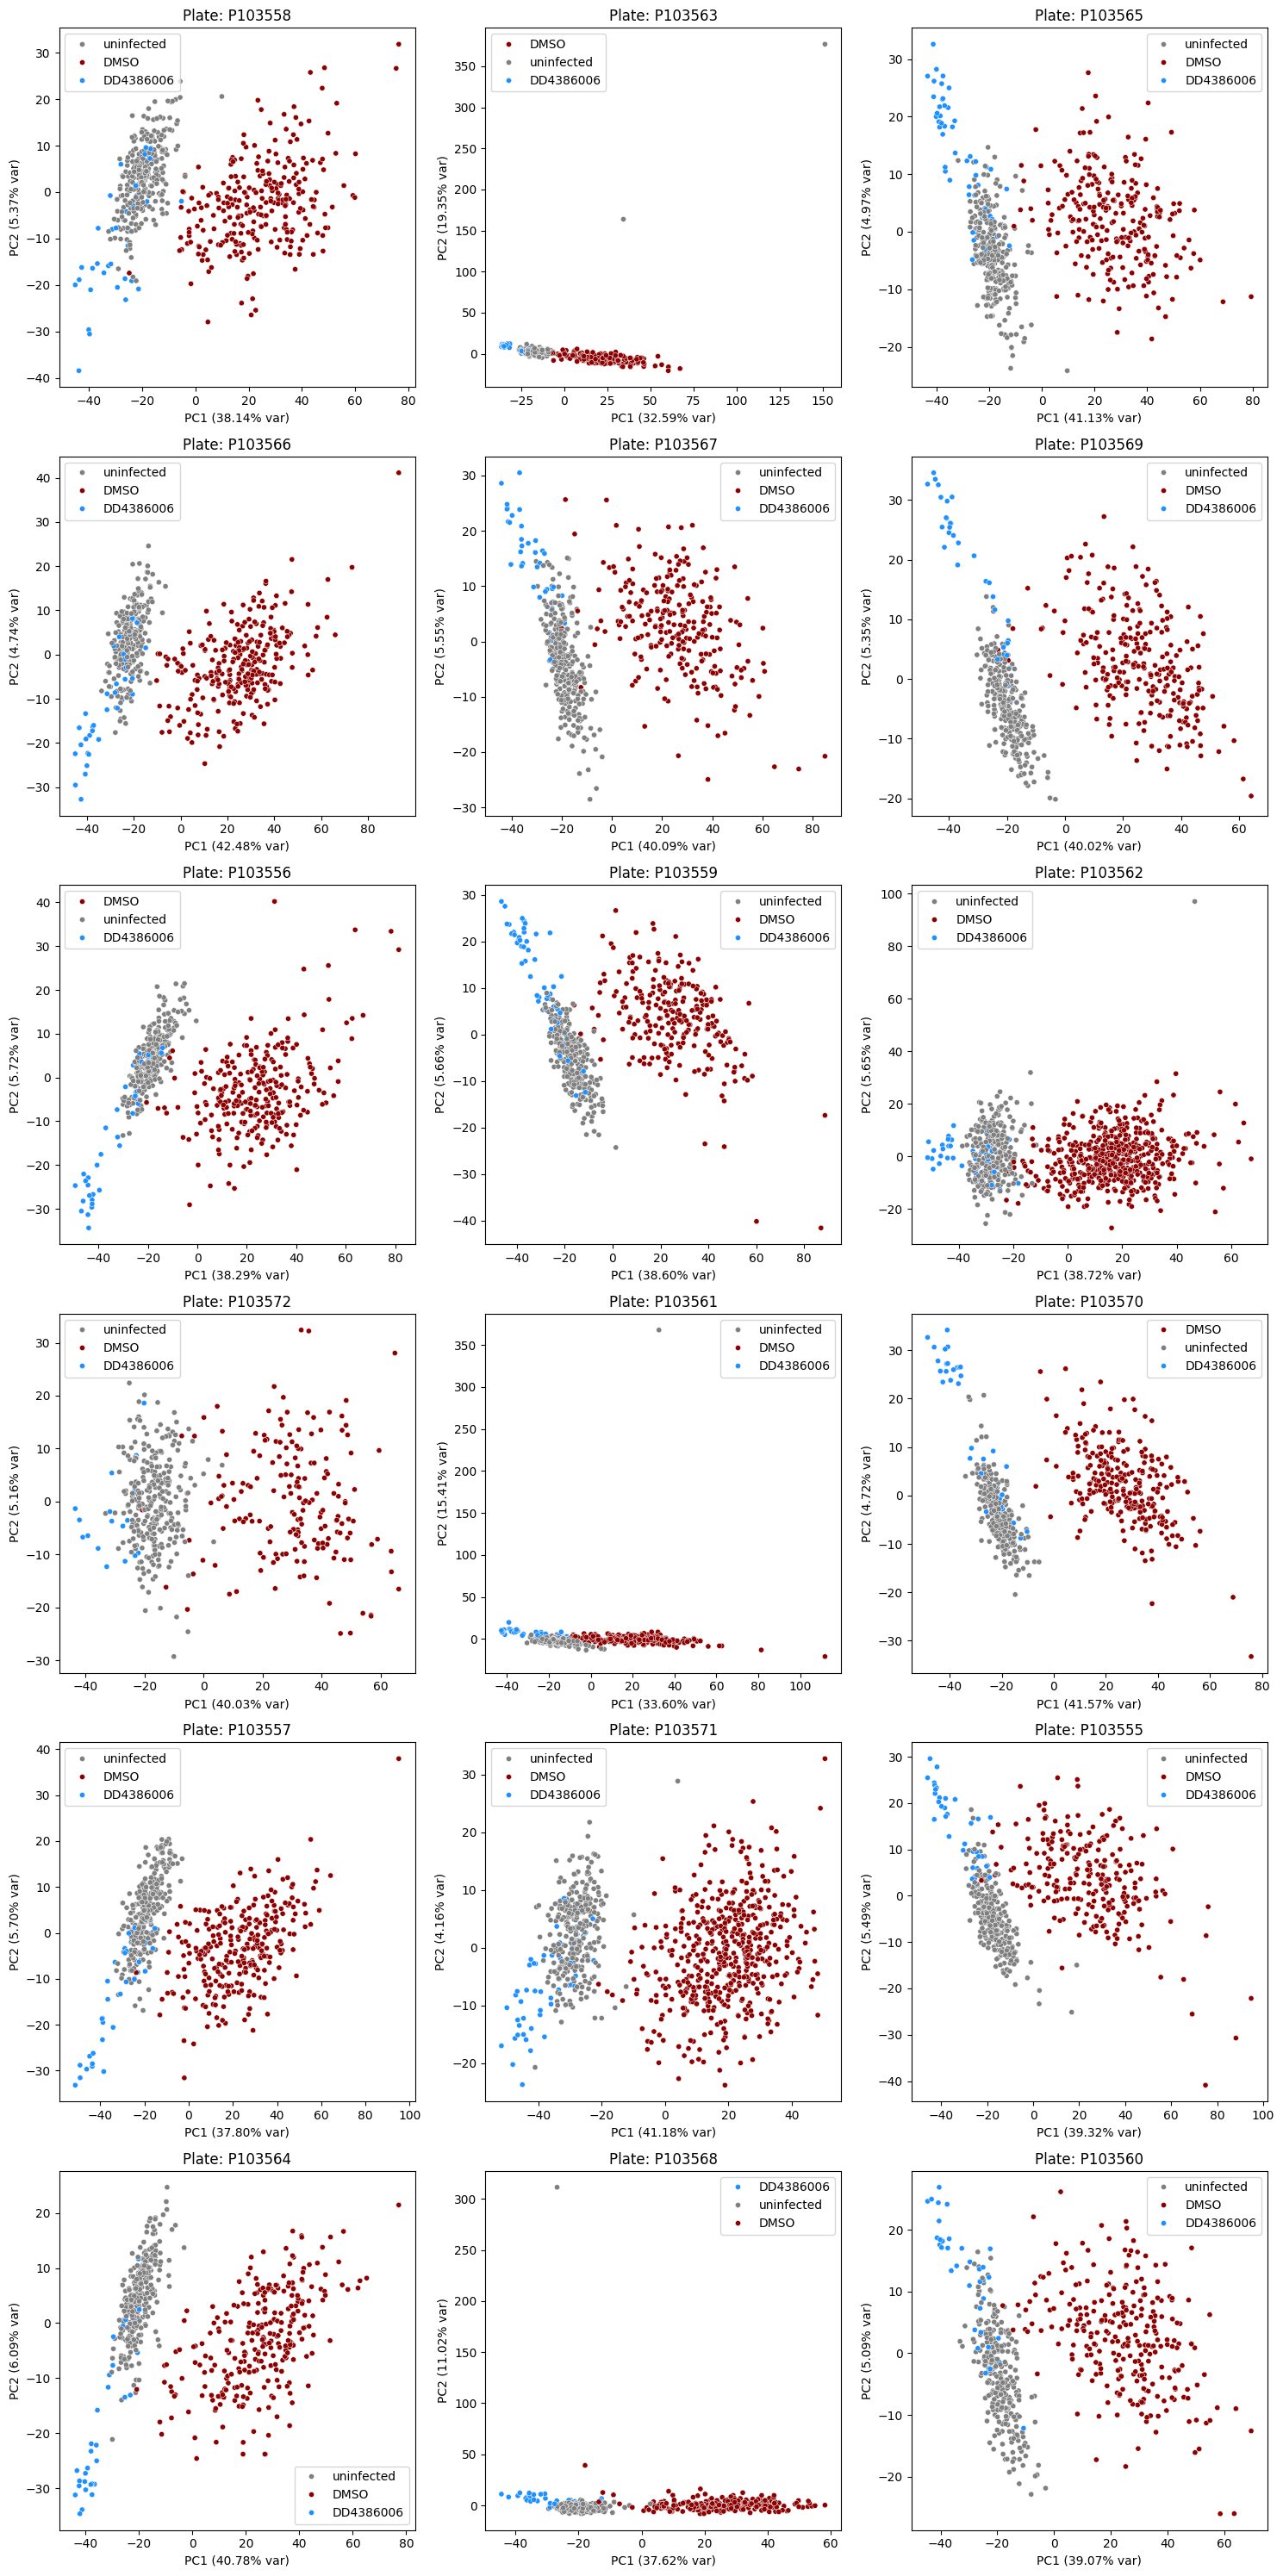

In [19]:
my_palette = {
    'uninfected': '#7F7F7F',  
    'DMSO': '#8B0000',  
    'DD4386006': '#1E90FF'  
}


run_pca_per_plate(
    df, 
    color_column='Metadata_cmpdName',  
    n_components=2, 
    custom_palette=my_palette,  
    output_filename='PCA_per_plate.png'  
)

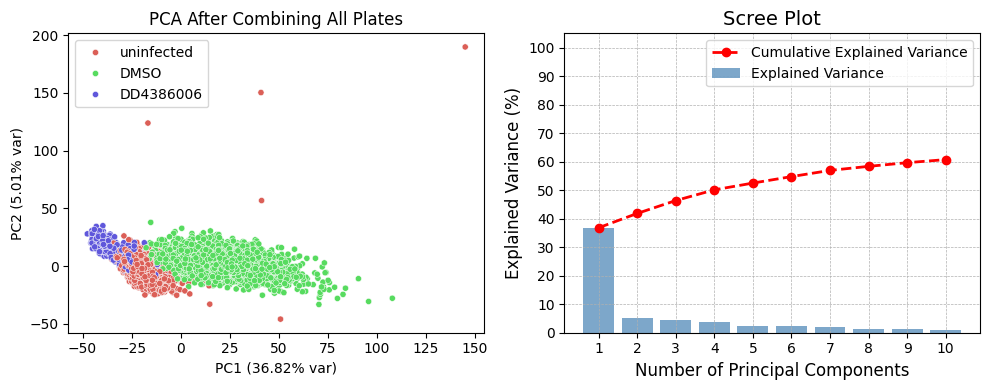

In [20]:
run_pca_all_plates(df,color_column='Metadata_cmpdName', n_components=10,custom_palette=None, output_filename='PCA_per_plate.png')

# cleaned features on well level

In [21]:
df_all    = pd.read_parquet("../level7_modz_consensus_df_perwell.parquet")

df = df_all.copy()

#------------- plates ----------------#
selected_plates = ["P103573","P103587","P103588"]
df = df[~df['Metadata_plate_map_name'].isin(selected_plates)]

# ----------- compounds ---------------#
selected_compounds = ["DMSO", "uninfected","DD4386006"]
df = df[df['Metadata_cmpdName'].isin(selected_compounds)]

#------------- doses ----------------#
selected_doses = [0.3,10.0]
df = df[df['Metadata_cmpdConc'].isin(selected_doses)]

# remove AB features !!!
df = df.filter(regex='^(?!.*ER)') #remove AB features
df

,Metadata_plate_map_name,Metadata_cmpdName,Metadata_cmpdConc,Metadata_cmpdAndDose,Metadata_Well,Nuclei_AreaShape_Eccentricity,Nuclei_AreaShape_Extent,Nuclei_AreaShape_MajorAxisLength,Nuclei_AreaShape_MaxFeretDiameter,Nuclei_AreaShape_MinFeretDiameter,...,Cells_RadialDistribution_ZernikePhase_RNA_8_0,Cells_RadialDistribution_ZernikePhase_RNA_8_2,Cells_RadialDistribution_ZernikePhase_RNA_8_4,Cells_RadialDistribution_ZernikePhase_RNA_8_6,Cells_RadialDistribution_ZernikePhase_RNA_8_8,Cells_RadialDistribution_ZernikePhase_RNA_9_1,Cells_RadialDistribution_ZernikePhase_RNA_9_3,Cells_RadialDistribution_ZernikePhase_RNA_9_5,Cells_RadialDistribution_ZernikePhase_RNA_9_7,Cells_RadialDistribution_ZernikePhase_RNA_9_9
288,P103555,DD4386006,0.3,DD4386006_0.3,G01,-0.681587,1.287419,2.140383,2.269107,2.684067,...,0.704975,-0.321546,0.071195,0.430293,-0.096450,0.383388,0.200811,0.017333,0.305662,-0.144521
289,P103555,DD4386006,0.3,DD4386006_0.3,K05,-0.094515,0.917142,1.500497,1.539897,1.627995,...,1.471872,0.718134,0.465510,-0.415308,0.561812,-0.330084,-0.000420,-0.069271,0.255580,0.342767
292,P103555,DD4386006,10.0,DD4386006_10.0,E13,-0.480508,0.942348,4.046019,4.248707,4.310287,...,1.955894,-0.232563,-0.179604,-0.174519,-0.043658,0.033201,0.005460,-0.411261,0.049103,-0.572720
293,P103555,DD4386006,10.0,DD4386006_10.0,G15,-0.376901,0.148659,3.878235,4.096259,4.036762,...,1.525587,-0.320442,-0.113166,0.569073,0.110509,0.566294,-0.727315,-0.159004,0.220965,-0.214041
304,P103555,DMSO,0.3,DMSO_0.3,B12,-0.498391,0.041028,-0.646799,-0.569970,-0.212608,...,-0.487150,-0.504062,0.603080,0.193354,0.602217,0.522457,-0.300453,0.423201,-0.348960,-0.376540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6822,P103572,uninfected,0.3,uninfected_0.3,N16,-0.994357,1.260487,0.716335,0.719511,1.633772,...,-0.357769,0.180900,0.106789,-0.180032,-0.366268,0.481790,0.120514,-0.129921,-0.100577,-0.027397
6823,P103572,uninfected,0.3,uninfected_0.3,O08,-1.421032,1.175672,0.674680,0.700812,1.882880,...,0.104896,0.188209,0.311097,0.217447,0.157854,0.260826,0.115425,0.415784,-0.883760,-0.458050
6824,P103572,uninfected,0.3,uninfected_0.3,O16,-1.192651,1.249726,0.381803,0.397858,1.487554,...,-0.052574,-0.288646,-0.039215,0.204964,-0.137535,0.252233,-0.228724,0.273382,0.008970,0.477979
6825,P103572,uninfected,0.3,uninfected_0.3,P08,-1.336448,1.201680,0.949319,1.023840,2.014629,...,0.059582,0.293751,0.209939,0.212224,-0.136855,-0.067665,-0.397528,-0.014869,-0.209354,0.043438


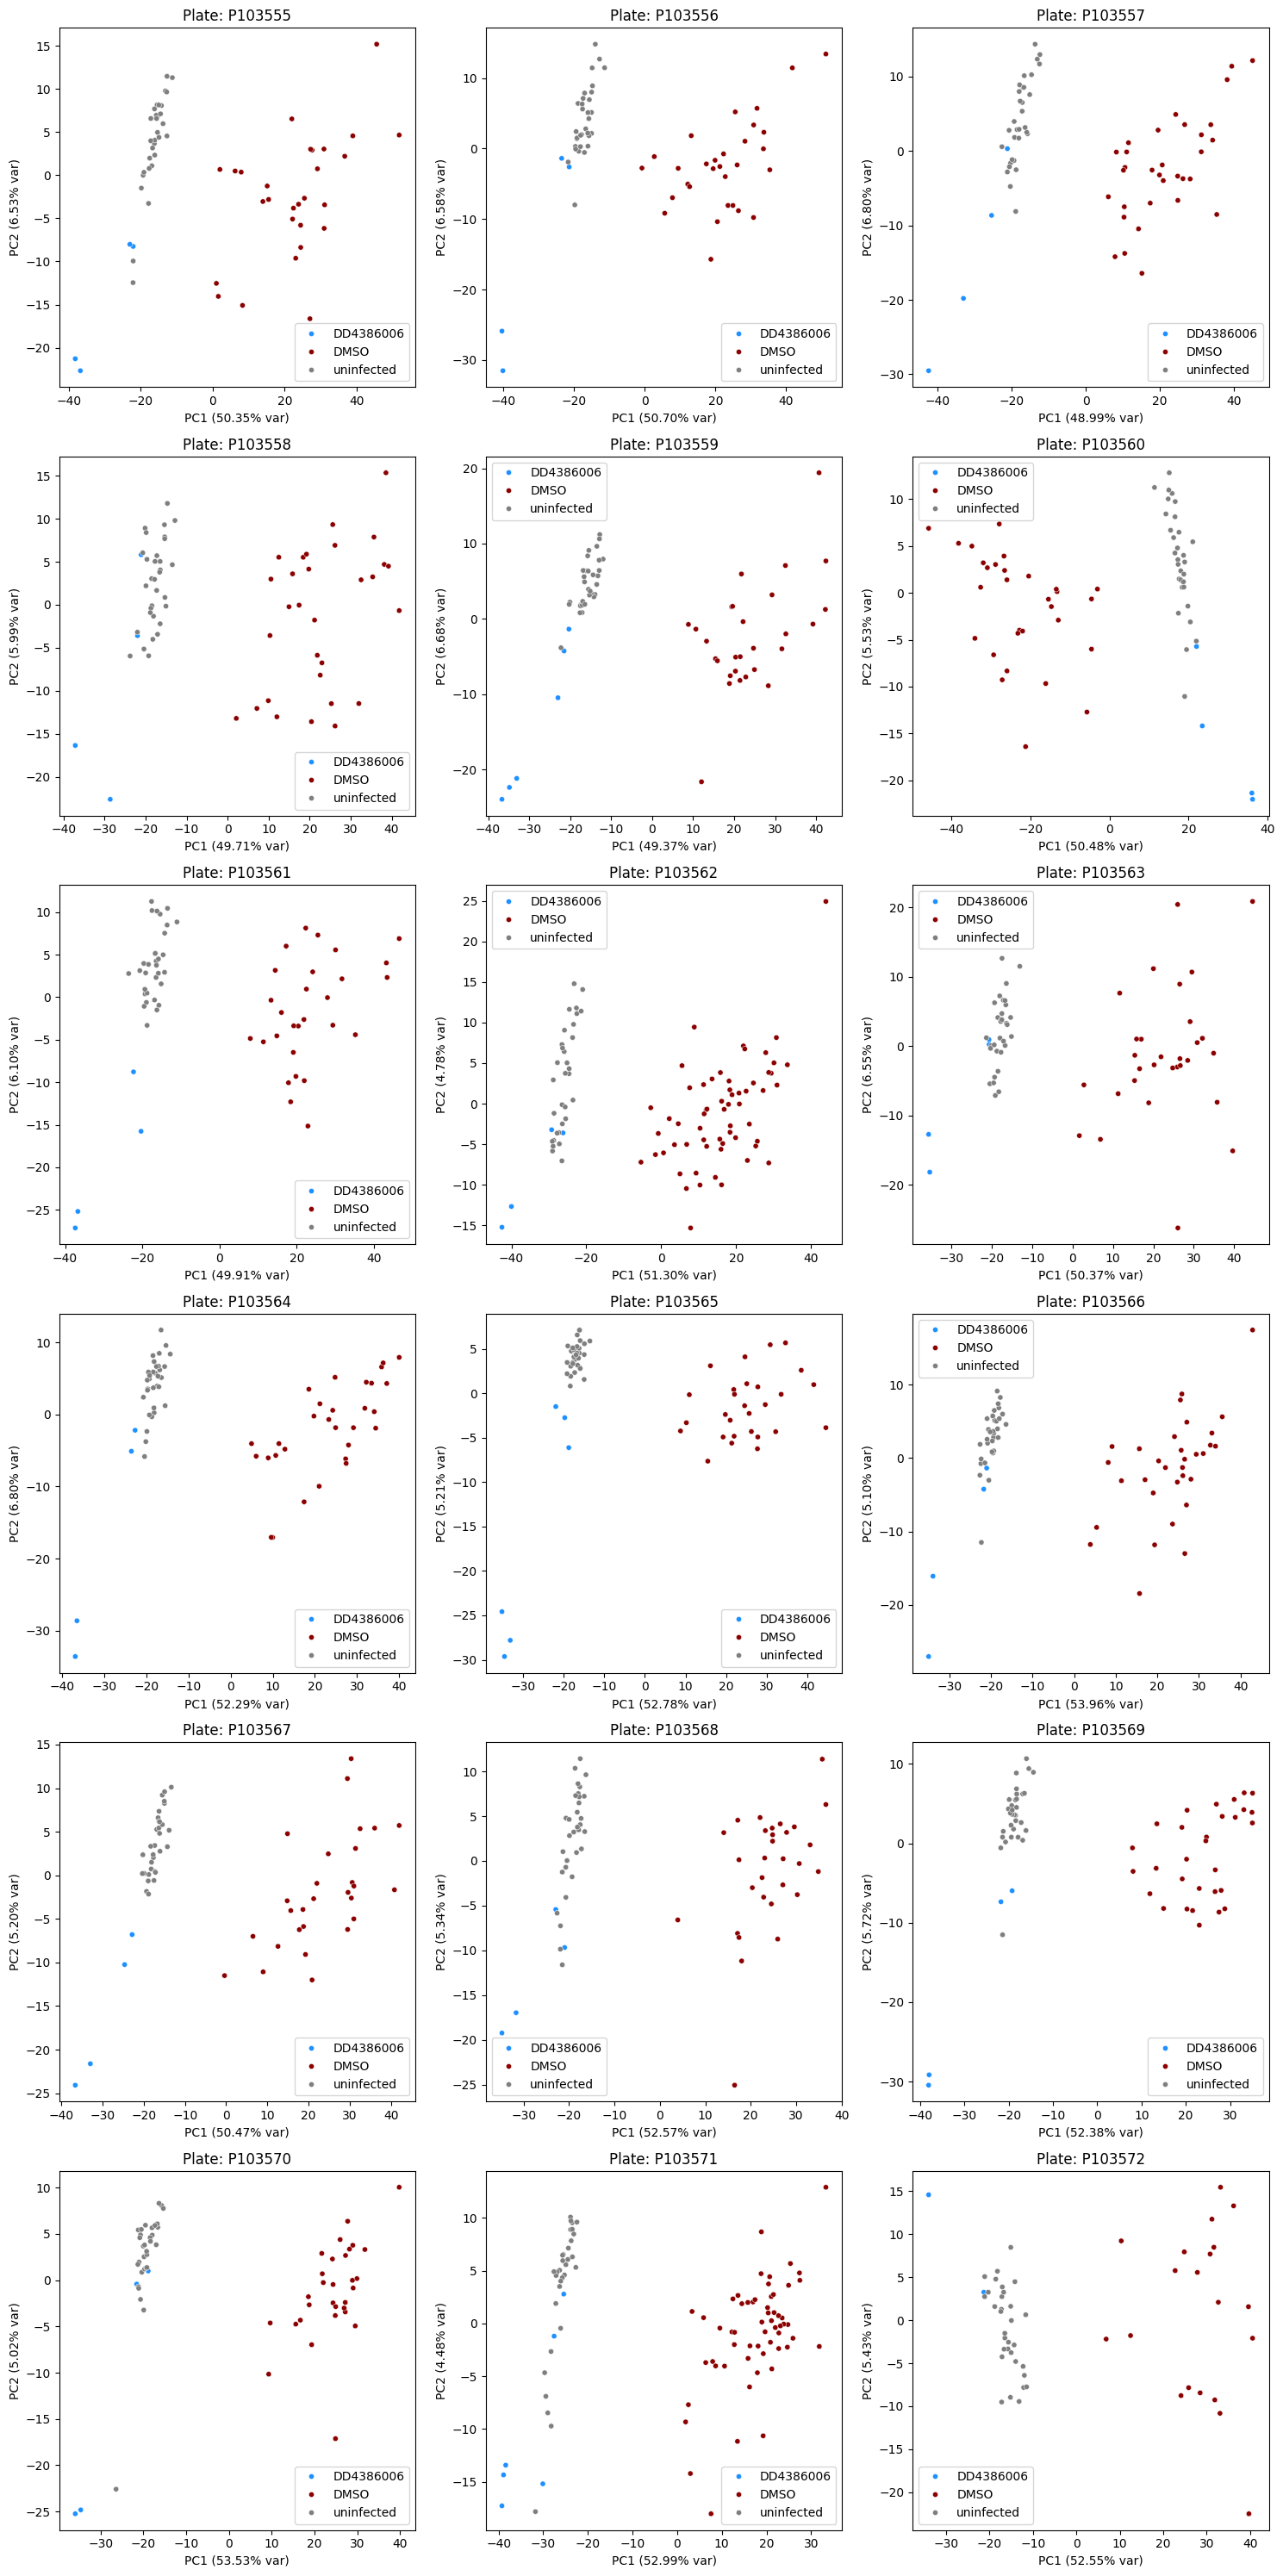

In [22]:
run_pca_per_plate(
    df, 
    color_column='Metadata_cmpdName',  
    n_components=10, 
    custom_palette=my_palette,  
    output_filename='PCA_per_plate.png')

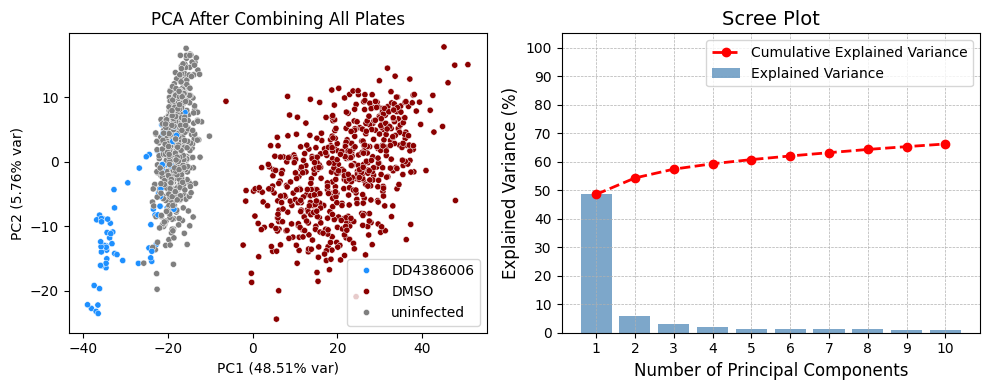

In [23]:
run_pca_all_plates(
    df, 
    color_column='Metadata_cmpdName',  
    n_components=10, 
    custom_palette=my_palette,  
    output_filename='PCA_per_plate.png'  
)

# variance explained and loadings

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

n_components = 10
combined_data = df.loc[:, ~df.columns.str.contains('Meta')].dropna()
pca = PCA(n_components=n_components)
X_pca_combined = pca.fit_transform(StandardScaler().fit_transform(combined_data))

explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by component: {explained_variance}')

Explained variance by component: [0.48507657 0.05764371 0.03096904 0.01891776 0.01455054 0.01277715
 0.0115158  0.01134524 0.00984941 0.00934669]


# feature importance

In [29]:
loadings   = pca.components_

loading_df = pd.DataFrame(loadings.T,  
                          columns=[f'PC{i+1}' for i in range(n_components)], 
                          index=combined_data.columns)  

sorted_df    = loading_df['PC1'].sort_values(ascending=False)
highest_10   = sorted_df.head(10)
smallest_10  = sorted_df.tail(10)

In [30]:
highest_10

Cells_RadialDistribution_ZernikeMagnitude_DNA_2_2        0.045747
Cells_RadialDistribution_ZernikeMagnitude_DNA_6_4        0.045680
Cytoplasm_Intensity_StdIntensity_AGP                     0.045669
Cells_RadialDistribution_ZernikeMagnitude_DNA_5_3        0.045664
Cells_RadialDistribution_ZernikeMagnitude_DNA_4_2        0.045645
Cells_RadialDistribution_ZernikeMagnitude_DNA_8_4        0.045633
Cytoplasm_RadialDistribution_ZernikeMagnitude_AGP_3_1    0.045607
Cells_RadialDistribution_ZernikeMagnitude_DNA_9_5        0.045604
Cells_RadialDistribution_ZernikeMagnitude_AGP_4_2        0.045588
Cells_RadialDistribution_ZernikeMagnitude_DNA_3_3        0.045584
Name: PC1, dtype: float64

In [31]:
smallest_10

Cytoplasm_Granularity_1_DNA                      -0.044934
Cytoplasm_AreaShape_Zernike_0_0                  -0.044953
Cytoplasm_AreaShape_Extent                       -0.044967
Cytoplasm_RadialDistribution_MeanFrac_AGP_2of4   -0.045027
Cytoplasm_AreaShape_MeanRadius                   -0.045116
Cytoplasm_AreaShape_Solidity                     -0.045167
Cells_AreaShape_MinFeretDiameter                 -0.045183
Cytoplasm_AreaShape_MinorAxisLength              -0.045321
Cells_AreaShape_MedianRadius                     -0.045371
Cells_RadialDistribution_FracAtD_AGP_3of4        -0.045483
Name: PC1, dtype: float64

In [35]:
# grouped importance for each PC
loading_df['Grouped_Feature'] = loading_df.index.to_series().apply(group_features)
df_abs = loading_df.iloc[:, :-1].abs()
mean_loading_per_group = df_abs.groupby(loading_df['Grouped_Feature']).mean()
mean_loading_per_group

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Grouped_Feature,,,,,,,,,,
AGP_Granularity,0.041882,0.018932,0.027338,0.012333,0.006286,0.012446,0.014237,0.009279,0.006393,0.005019
AGP_Intensity,0.041208,0.012399,0.021084,0.028653,0.003574,0.020612,0.016423,0.007663,0.009195,0.011734
AGP_RadialDistribution,0.024909,0.009843,0.012359,0.012861,0.014699,0.014340,0.016880,0.015994,0.019647,0.020456
AreaShape_Cells,0.031566,0.017591,0.016779,0.023507,0.004544,0.016652,0.031021,0.017889,0.024053,0.005825
AreaShape_Cytoplasm,0.036829,0.021633,0.017608,0.025164,0.005561,0.021715,0.031535,0.018979,0.025211,0.005093
AreaShape_Nuclei,0.027340,0.030709,0.021706,0.054400,0.007626,0.028912,0.034624,0.027980,0.027969,0.006082
DNA_Granularity,0.043352,0.014711,0.006572,0.015495,0.000779,0.033468,0.009304,0.023859,0.011645,0.002122
DNA_Intensity,0.031407,0.023305,0.021748,0.022419,0.006704,0.030498,0.023181,0.020028,0.013127,0.004057
DNA_RadialDistribution,0.022296,0.011450,0.011784,0.014968,0.016932,0.020578,0.021602,0.021284,0.019589,0.019203
